In [1]:
from py4j.java_gateway import JavaGateway
import matplotlib.pyplot as plt

gateway = JavaGateway()

print ("load data ...")
# read infrastructure, rollingstocks and timetable data
timetable_entry = gateway.createTimetableSimulationEntry("c:\\temp\\raildata\\infrastructure",
    "c:\\temp\\raildata\\rollingstocks",
    "c:\\temp\\raildata\\timetable")

simulator = timetable_entry.getSimulator()

print ("data loaded.")

load data ...
data loaded.


In [2]:
# get all tri
trips = timetable_entry.getUtilities().getTrips(-1, -1)
print("number of trips: ", len(trips)) # 2. get number of trips

number of trips:  1351


In [3]:
first_trip = trips[0]
print(first_trip.getNumber()) # 1. The vehicle ID

# A trip has one or more tripsections
# In each trip section there are several trip elements, for each trip element, you can search the name of operational point (stop)
# the arrive time, the departure time.
# The hour, minute and second of time can be read though getHour()/getMinute()/getSecond()

for trip_section in first_trip.getTripSections():
    
    # 3. The original stop/station is the first trip element
    # 4. The destination stop/station is the last trip element
    # 5.6. In between the sequece of trip element can be found
    index = 0
    for trip_element in trip_section.getTripElements():

        print("Operational Point: {0}, Arrive Time: {1}, Departure Time: {2}".format(
            trip_element.getOperationalPoint(), 
            trip_element.getArriveTime(), # 11. Scheduled arrive time
            trip_element.getDepartureTime())) # 8. Scheduled departure time
        print("Arrive Time - Hour: {0}, Minute: {1}, Second: {2}".format(
            trip_element.getArriveTime().getHour(), 
            trip_element.getArriveTime().getMinute(), 
            trip_element.getArriveTime().getSecond()))
        print("Station - id: {0}, name: {1}, abbreviation: {2}".format( # 15. Station name 
            trip_element.getStation().getId(), 
            trip_element.getStation().getDescription(), 
            trip_element.getStation().getName()))
        
        if index > 0:
            path = trip_section.getNextPathStartFrom(index - 1)
            print("Length from last stop [meter]: ", path.getLength().getMeter()) # 7. Length of the section
            
        index += 1

4425_2
Operational Point: Measument Point: Seelze Pbf.G-4, Arrive Time: 17:29:41.0 d:0, Departure Time: 17:29:41.0 d:0
Arrive Time - Hour: 17, Minute: 29, Second: 41
Station - id: 15, name: Seelze Pbf, abbreviation: HS
Operational Point: Measument Point: Sbk439 (1700).X-2, Arrive Time: 17:30:43.0 d:0, Departure Time: 17:30:43.0 d:0
Arrive Time - Hour: 17, Minute: 30, Second: 43
Station - id: 45, name: Sbk439 (1700), abbreviation: H439L
Length from last stop [meter]:  2327.0
Operational Point: Measument Point: Letter Abzw.G-2, Arrive Time: 17:31:31.0 d:0, Departure Time: 17:31:31.0 d:0
Arrive Time - Hour: 17, Minute: 31, Second: 31
Station - id: 18, name: Letter Abzw, abbreviation: HLTA
Length from last stop [meter]:  1796.0
Operational Point: Measument Point: Sbk433 (1700).X-2, Arrive Time: 17:32:43.0 d:0, Departure Time: 17:32:43.0 d:0
Arrive Time - Hour: 17, Minute: 32, Second: 43
Station - id: 17, name: Sbk433 (1700), abbreviation: H433L
Length from last stop [meter]:  1774.0
Operat

In [4]:
# the simulation period will be set from 7:00 to 8:00

timetable_entry.setSimulationTime(simulator, 7, 8)

print("run simulation ...")
simulator.run()

# the results of simulation can be customized by user

run simulation ...


In [5]:
for train_simulator in simulator.getTrainSimulators():
    print(train_simulator.getTrain().getNumber())
    
    arrive_deviations = train_simulator.getArriveDeviations()
    departure_deviations = train_simulator.getDepartureDeviations()
    
    index = 0
    for trip_element in train_simulator.getTripSection().getTripElements():
        actual_arrive = trip_element.getArriveTime().add(arrive_deviations[index]) # 12. Actual arrival time
        actual_departure = trip_element.getDepartureTime().add(departure_deviations[index]) # 9. Actual departure time
        
        print("Actual arrive time: {0}, Deviation: {1}".format(actual_arrive, arrive_deviations[index]))
        print("Actual departure time : {0}, Deviation: {1}".format(actual_departure, departure_deviations[index]))
        
        index += 1
    
    #break

34604
Actual arrive time: 07:38:24.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 07:41:24.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:42:44.23 d:0, Deviation: Duration [Seconds=-27.977]
Actual departure time : 07:42:44.23 d:0, Deviation: Duration [Seconds=-27.977]
Actual arrive time: 07:43:30.958 d:0, Deviation: Duration [Seconds=-25.042]
Actual departure time : 07:43:30.958 d:0, Deviation: Duration [Seconds=-25.042]
Actual arrive time: 07:44:36.826 d:0, Deviation: Duration [Seconds=-25.174]
Actual departure time : 07:45:12.826 d:0, Deviation: Duration [Seconds=-25.174]
34603
Actual arrive time: 07:10:22.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 07:11:10.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:12:03.538 d:0, Deviation: Duration [Seconds=0.538]
Actual departure time : 07:12:03.538 d:0, Deviation: Duration [Seconds=0.538]
Actual arrive time: 07:12:51.257 d:0, Deviation: Duration [Seconds=-0.743]

Actual arrive time: 07:29:53.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 07:30:41.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:31:18.768 d:0, Deviation: Duration [Seconds=-5.232]
Actual departure time : 07:31:18.768 d:0, Deviation: Duration [Seconds=-5.232]
Actual arrive time: 07:33:48.170 d:0, Deviation: Duration [Seconds=-33.830]
Actual departure time : 07:34:36.170 d:0, Deviation: Duration [Seconds=-33.830]
Actual arrive time: 07:37:12.906 d:0, Deviation: Duration [Seconds=-60.094]
Actual departure time : 07:40:17.906 d:0, Deviation: Duration [Seconds=-60.094]
Actual arrive time: 07:41:51.57 d:0, Deviation: Duration [Seconds=-83.943]
Actual departure time : 07:41:51.57 d:0, Deviation: Duration [Seconds=-83.943]
Actual arrive time: 07:42:18.750 d:0, Deviation: Duration [Seconds=-87.250]
Actual departure time : 07:42:48.750 d:0, Deviation: Duration [Seconds=-87.250]
Actual arrive time: 07:45:10.776 d:0, Deviation: Duration [Seconds=-94.224]


Actual departure time : 07:33:24.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:43:08.659 d:0, Deviation: Duration [Seconds=488.659]
Actual departure time : 07:43:08.659 d:0, Deviation: Duration [Seconds=488.659]
Actual arrive time: 07:44:54.176 d:0, Deviation: Duration [Seconds=504.176]
Actual departure time : 07:44:54.176 d:0, Deviation: Duration [Seconds=504.176]
Actual arrive time: 07:45:59.336 d:0, Deviation: Duration [Seconds=522.336]
Actual departure time : 07:45:59.336 d:0, Deviation: Duration [Seconds=522.336]
Actual arrive time: 07:48:18.26 d:0, Deviation: Duration [Seconds=558.026]
Actual departure time : 07:48:18.26 d:0, Deviation: Duration [Seconds=558.026]
Actual arrive time: 07:52:42.806 d:0, Deviation: Duration [Seconds=556.806]
Actual departure time : 07:52:42.806 d:0, Deviation: Duration [Seconds=556.806]
Actual arrive time: 07:54:13.767 d:0, Deviation: Duration [Seconds=539.767]
Actual departure time : 07:54:13.767 d:0, Deviation: Duration [Seconds

Actual departure time : 07:47:52.483 d:0, Deviation: Duration [Seconds=33.483]
Actual arrive time: 07:48:42.483 d:0, Deviation: Duration [Seconds=31.483]
Actual departure time : 07:48:42.483 d:0, Deviation: Duration [Seconds=31.483]
69072
Actual arrive time: 07:36:32.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 07:36:32.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:39:31.843 d:0, Deviation: Duration [Seconds=86.843]
Actual departure time : 07:44:31.843 d:0, Deviation: Duration [Seconds=86.843]
Actual arrive time: 07:47:50.532 d:0, Deviation: Duration [Seconds=90.532]
Actual departure time : 07:47:50.532 d:0, Deviation: Duration [Seconds=90.532]
Actual arrive time: 07:49:05.634 d:0, Deviation: Duration [Seconds=102.634]
Actual departure time : 07:49:05.634 d:0, Deviation: Duration [Seconds=102.634]
Actual arrive time: 07:49:37.552 d:0, Deviation: Duration [Seconds=109.552]
Actual departure time : 07:49:37.552 d:0, Deviation: Duration [Seconds=10

Actual departure time : 07:12:43.656 d:0, Deviation: Duration [Seconds=70.656]
Actual arrive time: 07:15:28.270 d:0, Deviation: Duration [Seconds=49.270]
Actual departure time : 07:37:30.270 d:0, Deviation: Duration [Seconds=49.270]
Actual arrive time: 07:39:38.204 d:0, Deviation: Duration [Seconds=11.204]
Actual departure time : 07:39:38.204 d:0, Deviation: Duration [Seconds=11.204]
Actual arrive time: 07:40:20.93 d:0, Deviation: Duration [Seconds=10.093]
Actual departure time : 07:40:20.93 d:0, Deviation: Duration [Seconds=10.093]
Actual arrive time: 07:41:16.41 d:0, Deviation: Duration [Seconds=30.041]
Actual departure time : 07:41:16.41 d:0, Deviation: Duration [Seconds=30.041]
71_1
Actual arrive time: 07:32:47.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 07:32:47.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:36:00.96 d:0, Deviation: Duration [Seconds=26.096]
Actual departure time : 07:36:00.96 d:0, Deviation: Duration [Seconds=26.096]
Actu

Actual arrive time: 07:58:42.936 d:0, Deviation: Duration [Seconds=1,161.936]
Actual departure time : 07:58:42.936 d:0, Deviation: Duration [Seconds=1,161.936]
Actual arrive time: 08:00:40.557 d:0, Deviation: Duration [Seconds=1,165.557]
Actual departure time : 08:00:40.557 d:0, Deviation: Duration [Seconds=1,165.557]
Actual arrive time: 08:01:17.502 d:0, Deviation: Duration [Seconds=1,179.502]
Actual departure time : 08:01:17.502 d:0, Deviation: Duration [Seconds=1,179.502]
82866
Actual arrive time: 07:14:54.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 07:40:30.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:42:36.939 d:0, Deviation: Duration [Seconds=-34.061]
Actual departure time : 07:42:36.939 d:0, Deviation: Duration [Seconds=-34.061]
Actual arrive time: 07:45:11.851 d:0, Deviation: Duration [Seconds=-44.149]
Actual departure time : 07:45:11.851 d:0, Deviation: Duration [Seconds=-44.149]
4405
Actual arrive time: 07:29:41.0 d:0, Deviation: Du

Actual departure time : 07:44:33.746 d:0, Deviation: Duration [Seconds=11.746]
Actual arrive time: 07:45:20.134 d:0, Deviation: Duration [Seconds=15.134]
Actual departure time : 07:45:20.134 d:0, Deviation: Duration [Seconds=15.134]
Actual arrive time: 07:46:11.557 d:0, Deviation: Duration [Seconds=21.557]
Actual departure time : 07:46:11.557 d:0, Deviation: Duration [Seconds=21.557]
Actual arrive time: 07:47:23.166 d:0, Deviation: Duration [Seconds=42.166]
Actual departure time : 07:47:23.166 d:0, Deviation: Duration [Seconds=42.166]
988
Actual arrive time: 07:26:23.0 d:0, Deviation: Duration [Seconds=0.000]
Actual departure time : 07:26:23.0 d:0, Deviation: Duration [Seconds=0.000]
Actual arrive time: 07:27:33.138 d:0, Deviation: Duration [Seconds=47.138]
Actual departure time : 07:27:33.138 d:0, Deviation: Duration [Seconds=47.138]
Actual arrive time: 07:29:21.764 d:0, Deviation: Duration [Seconds=49.764]
Actual departure time : 07:29:21.764 d:0, Deviation: Duration [Seconds=49.764]

Actual departure time : 07:39:05.261 d:0, Deviation: Duration [Seconds=-74.739]
14705
Actual arrive time: 07:00:27.500 d:0, Deviation: Duration [Seconds=-10.500]
Actual departure time : 07:00:27.500 d:0, Deviation: Duration [Seconds=-10.500]
Actual arrive time: 07:02:12.351 d:0, Deviation: Duration [Seconds=21.351]
Actual departure time : 07:02:12.351 d:0, Deviation: Duration [Seconds=21.351]
Actual arrive time: 07:02:28.590 d:0, Deviation: Duration [Seconds=21.590]
Actual departure time : 07:02:28.590 d:0, Deviation: Duration [Seconds=21.590]
Actual arrive time: 07:04:34.477 d:0, Deviation: Duration [Seconds=31.477]
Actual departure time : 07:04:34.477 d:0, Deviation: Duration [Seconds=31.477]
Actual arrive time: 07:04:40.442 d:0, Deviation: Duration [Seconds=31.442]
Actual departure time : 07:04:40.442 d:0, Deviation: Duration [Seconds=31.442]
Actual arrive time: 07:06:38.394 d:0, Deviation: Duration [Seconds=9.394]
Actual departure time : 07:08:38.394 d:0, Deviation: Duration [Secon

Actual departure time : 07:30:00.554 d:0, Deviation: Duration [Seconds=-85.446]
Actual arrive time: 07:31:08.893 d:0, Deviation: Duration [Seconds=-82.107]
Actual departure time : 07:31:50.893 d:0, Deviation: Duration [Seconds=-82.107]
Actual arrive time: 07:32:32.887 d:0, Deviation: Duration [Seconds=-82.113]
Actual departure time : 07:32:32.887 d:0, Deviation: Duration [Seconds=-82.113]
Actual arrive time: 07:33:46.263 d:0, Deviation: Duration [Seconds=-81.737]
Actual departure time : 07:33:46.263 d:0, Deviation: Duration [Seconds=-81.737]
Actual arrive time: 07:34:08.970 d:0, Deviation: Duration [Seconds=-82.030]
Actual departure time : 07:34:08.970 d:0, Deviation: Duration [Seconds=-82.030]
Actual arrive time: 07:34:28.649 d:0, Deviation: Duration [Seconds=-81.351]
Actual departure time : 07:34:28.649 d:0, Deviation: Duration [Seconds=-81.351]
Actual arrive time: 07:35:48.230 d:0, Deviation: Duration [Seconds=-72.770]
Actual departure time : 07:35:48.230 d:0, Deviation: Duration [S

Actual arrive time: 07:21:32.96 d:0, Deviation: Duration [Seconds=42.096]
Actual departure time : 07:21:32.96 d:0, Deviation: Duration [Seconds=42.096]
Actual arrive time: 07:24:16.908 d:0, Deviation: Duration [Seconds=36.908]
Actual departure time : 07:27:16.908 d:0, Deviation: Duration [Seconds=36.908]
Actual arrive time: 07:29:49.29 d:0, Deviation: Duration [Seconds=-26.971]
Actual departure time : 07:29:49.29 d:0, Deviation: Duration [Seconds=-26.971]
Actual arrive time: 07:31:30.266 d:0, Deviation: Duration [Seconds=-32.734]
Actual departure time : 07:31:30.266 d:0, Deviation: Duration [Seconds=-32.734]
Actual arrive time: 07:32:05.363 d:0, Deviation: Duration [Seconds=-21.637]
Actual departure time : 07:32:05.363 d:0, Deviation: Duration [Seconds=-21.637]
3600
Actual arrive time: 07:40:42.500 d:0, Deviation: Duration [Seconds=-10.500]
Actual departure time : 07:40:42.500 d:0, Deviation: Duration [Seconds=-10.500]
Actual arrive time: 07:41:45.994 d:0, Deviation: Duration [Seconds=

Train number:  34604


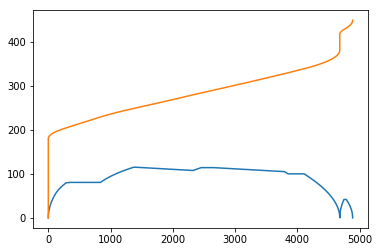

Train number:  34603


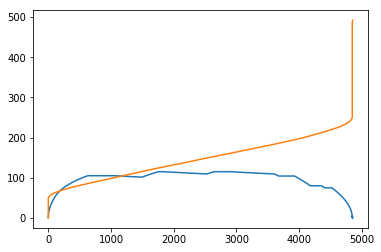

Train number:  82815_1


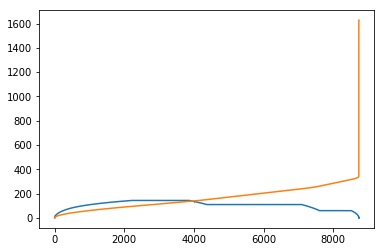

Train number:  40010


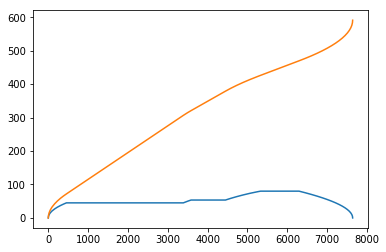

Train number:  40009


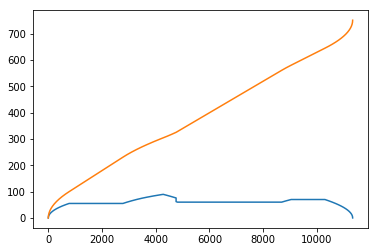

Train number:  1278


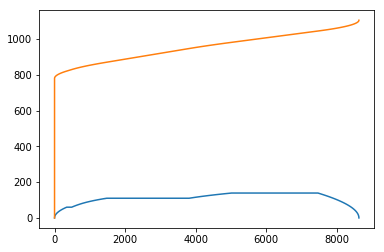

Train number:  51122


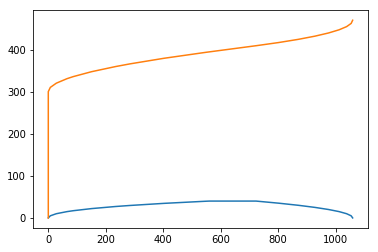

Train number:  14854


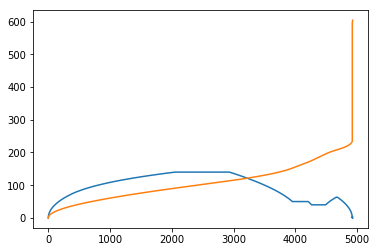

Train number:  43161


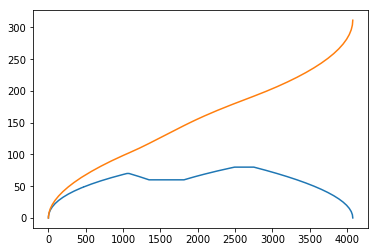

Train number:  34208


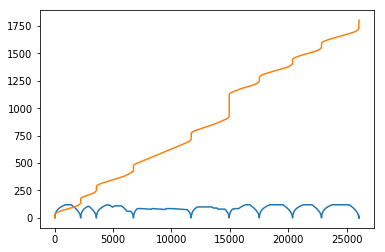

Train number:  1091


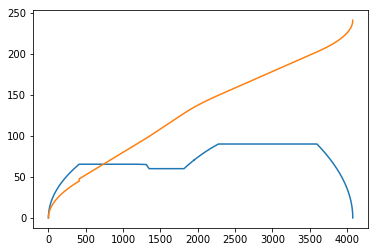

Train number:  2182


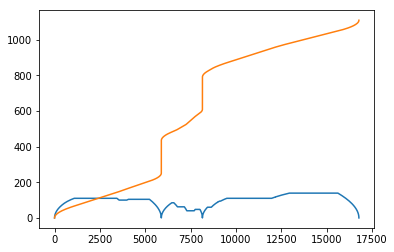

Train number:  14843


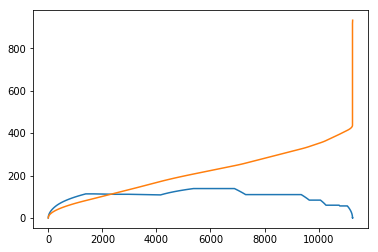

Train number:  34414


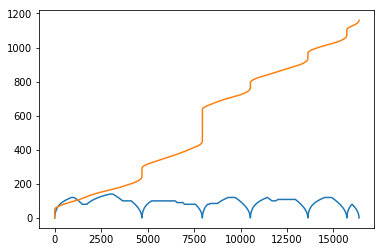

Train number:  34413


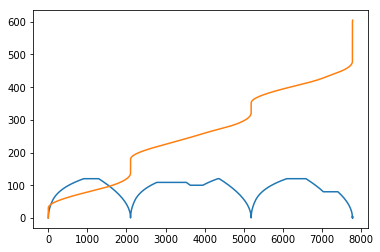

Train number:  34412


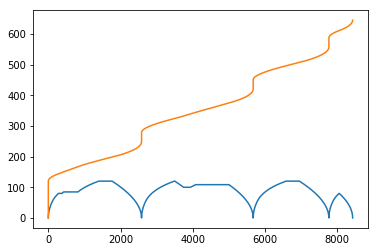

Train number:  34411


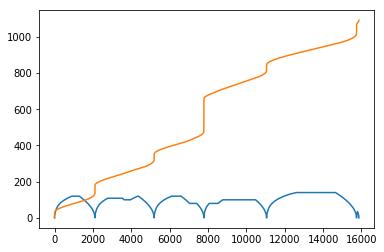

Train number:  52286


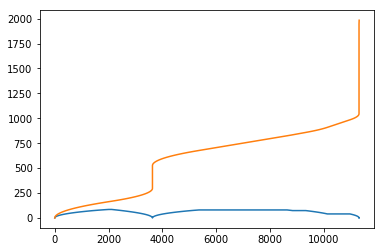

Train number:  51539


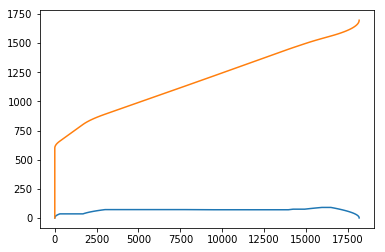

Train number:  53715


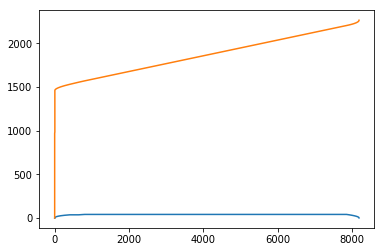

Train number:  34163


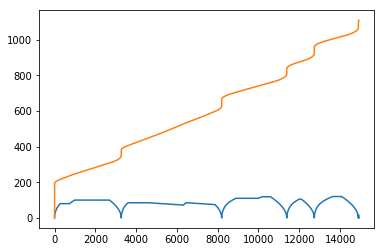

Train number:  34162


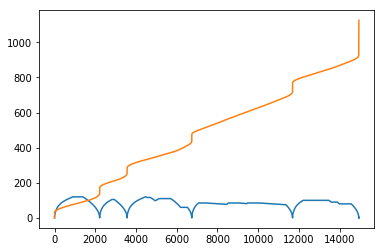

Train number:  60012


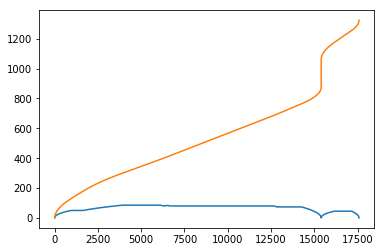

Train number:  69062


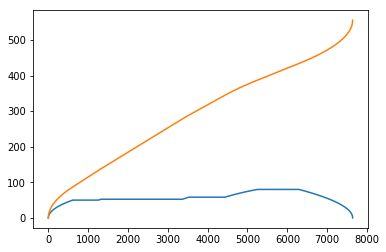

Train number:  53727


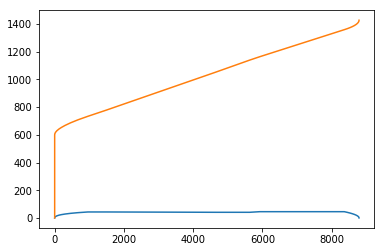

Train number:  69072


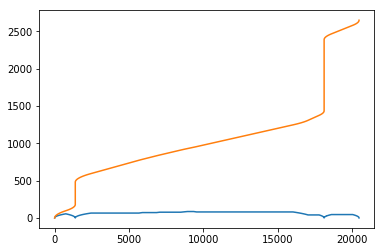

Train number:  51577


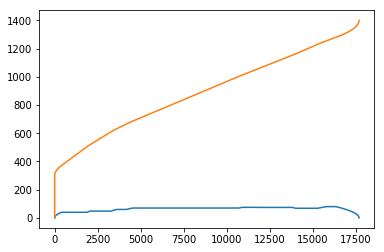

Train number:  34113


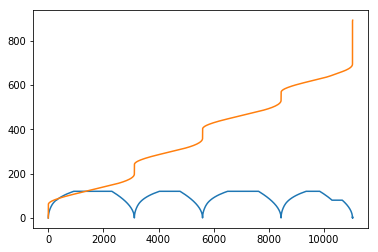

Train number:  34112


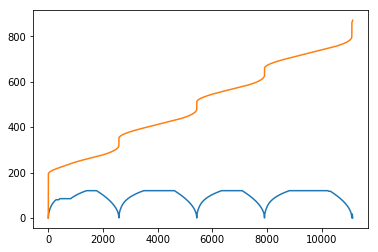

Train number:  63912


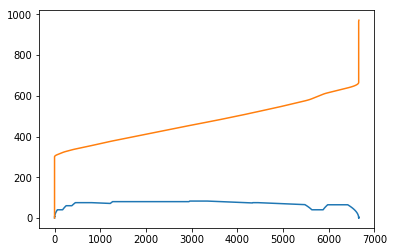

Train number:  1743


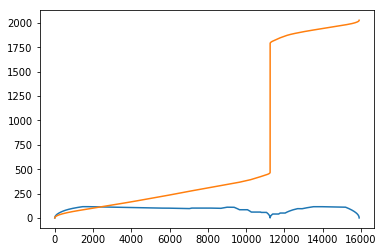

Train number:  71_1


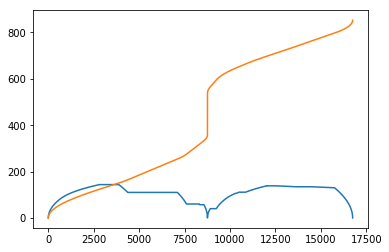

Train number:  4842


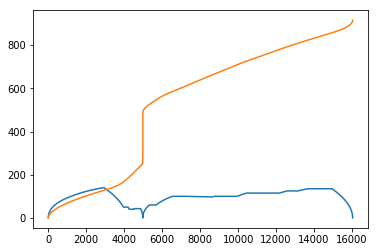

Train number:  34207_1


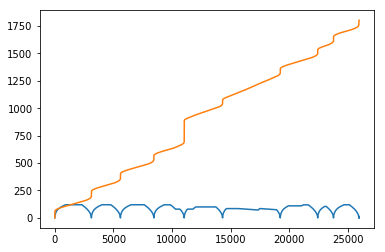

Train number:  4873


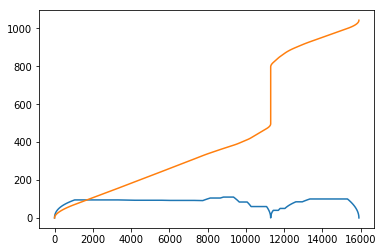

Train number:  946


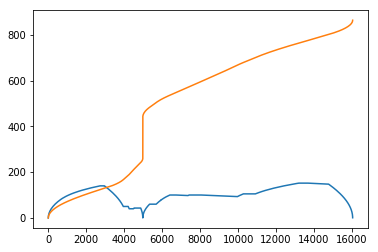

Train number:  14091


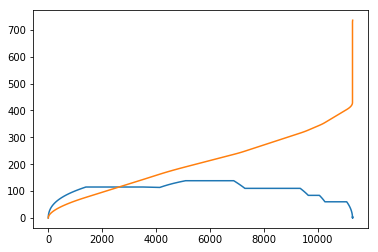

Train number:  82865


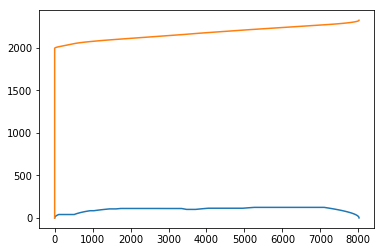

Train number:  82866


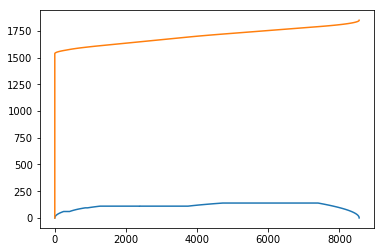

Train number:  4405


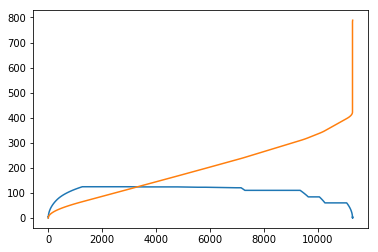

Train number:  4406


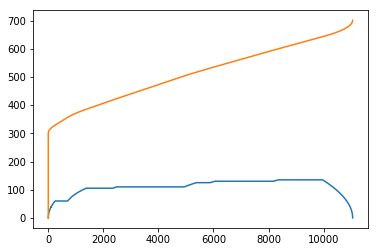

Train number:  2241


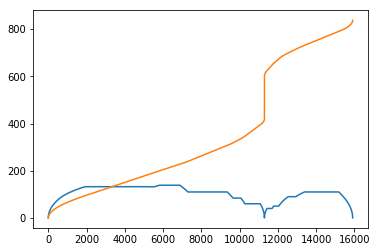

Train number:  2236


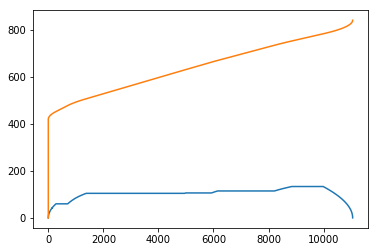

Train number:  44722


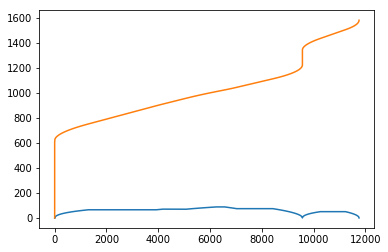

Train number:  82816_1


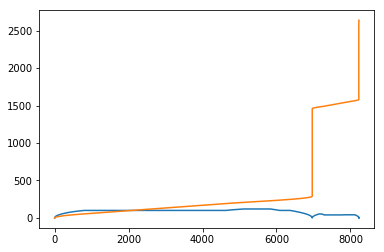

Train number:  2013


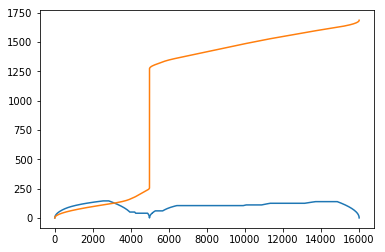

Train number:  988


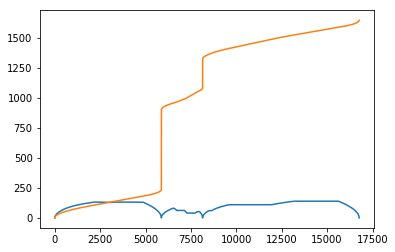

Train number:  2277


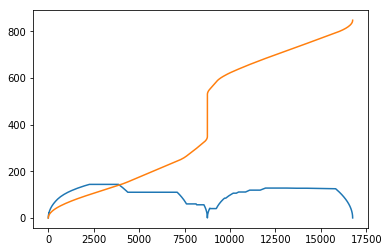

Train number:  14714


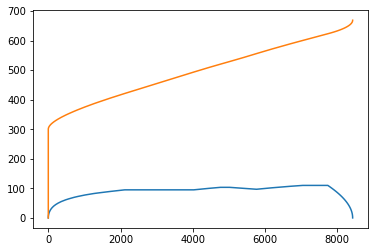

Train number:  541


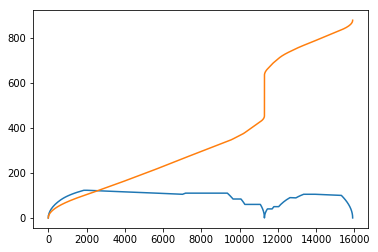

Train number:  43017


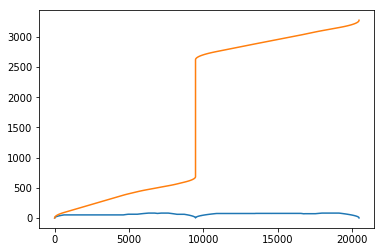

Train number:  34304


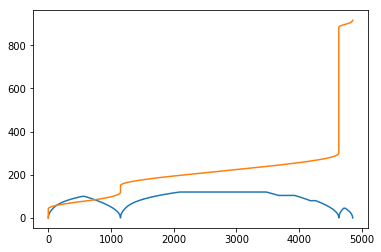

Train number:  34307


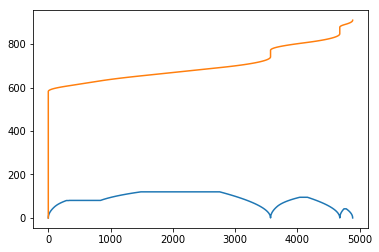

Train number:  14705


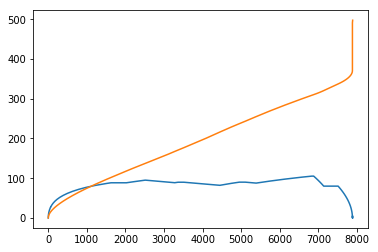

Train number:  34532


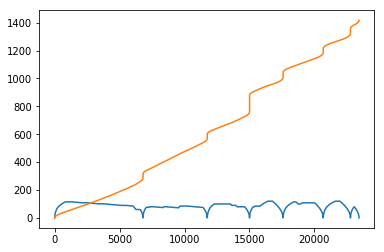

Train number:  34531


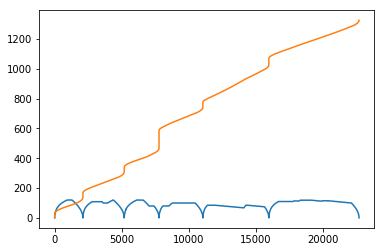

Train number:  34530


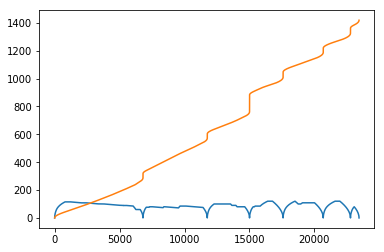

Train number:  34529


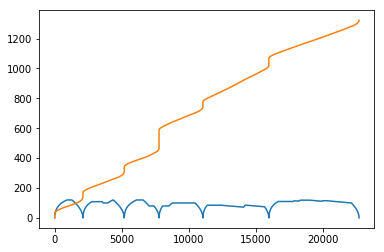

Train number:  72577


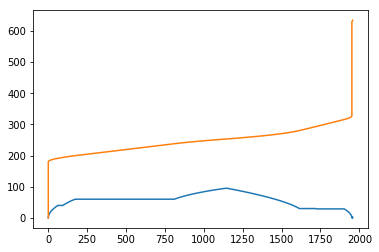

Train number:  53830


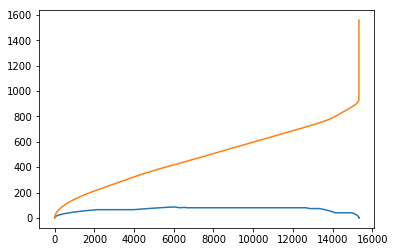

Train number:  34016


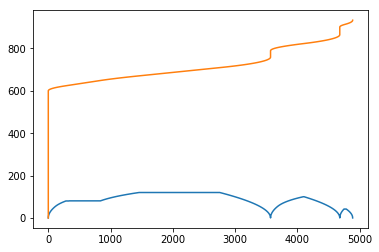

Train number:  34015


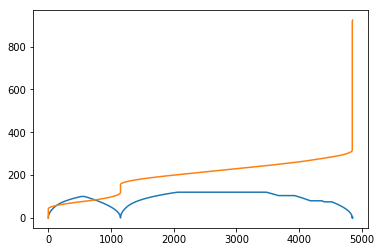

Train number:  14063


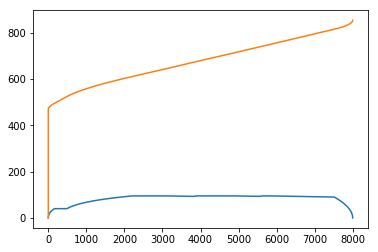

Train number:  14062


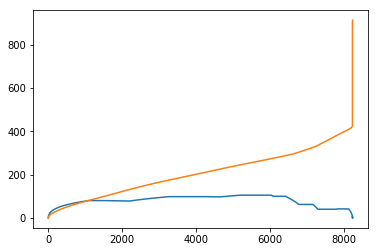

Train number:  51820


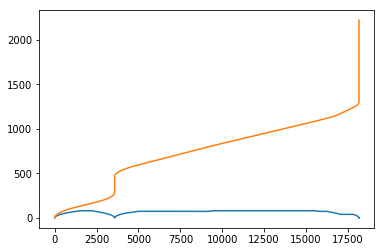

Train number:  14042


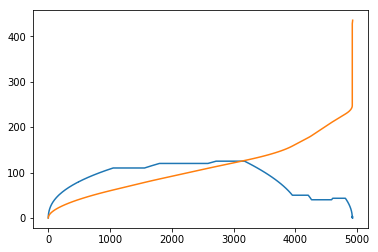

Train number:  783_1


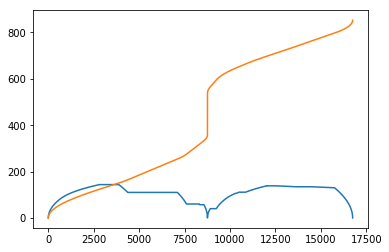

Train number:  3600


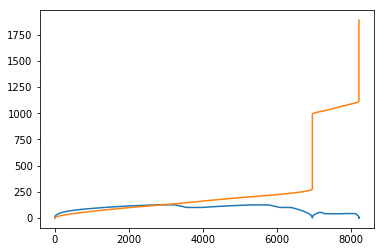

Train number:  14002


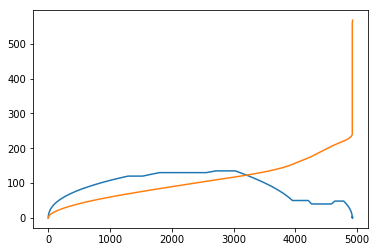

Train number:  60107


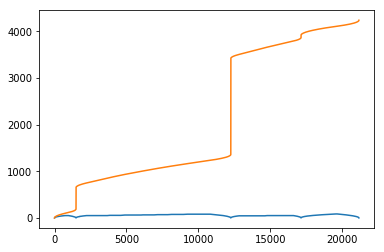

Train number:  51632


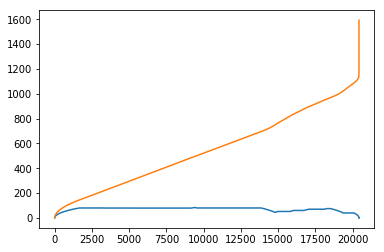

Train number:  14005


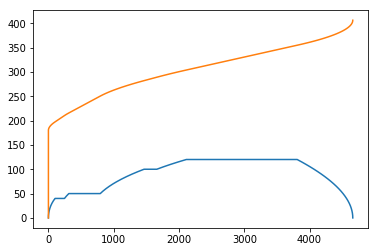

In [6]:
for train_simulator in simulator.getTrainSimulators():
    print("Train number: ", train_simulator.getTrain().getNumber())
    # inside a course there are many DiscretePoint, which describes running dynamics
    course = train_simulator.getWholeCoursePoints()
    
    distances = []
    velocities = []
    times = []
    meter = 0
    time = 0
            
    for point in course:
        meter += point.getDistance().getMeter()
        time += point.getDuration().getTotalSeconds()
        distances.append(meter);
        times.append(time)
        velocities.append(point.getVelocity().getKilometerPerHour())
    
    plt.plot(distances, velocities) # 22. 24. Location of the train (from start station) and Velocity(Scheduled running trajectory)
    plt.plot(distances, times)
    plt.show()
    
    # break # only print the first one

In [7]:
# 17. Scheduled waiting time (after timetable simulation)
print("Total waiting time in seconds: ", simulator.getDispatchingSystem().getTotalPending().getTotalSeconds())

Total waiting time in seconds:  14992.862999999996


In [8]:
def output_occupancy():
    print ("Occupancy time of tracks:")
    elements = timetable_entry.getAllInfrastructureElements()
    for element in elements:
        oMap = timetable_entry.getOccupancyMap(simulator, element)
        if oMap is not None:
            print ("Track Id: ", element, ":")
            lastKey = 0;
            for key in oMap:
                if key != 0:
                    print ("    ", lastKey, "-", key, "m:", oMap[key])
                lastKey = key
            print()

output_occupancy()

Occupancy time of tracks:
Track Id:  82468.hh - 82469.hh :

Track Id:  82466.hh - 83670.hh :
     0.0 - 721.0 m: Duration [Seconds=306.955]
     721.0 - 729.0 m: Duration [Seconds=211.580]

Track Id:  83062.hh - 83065.hh :
     0.0 - 153.0 m: Duration [Seconds=708.011]

Track Id:  82909.hh - 82819.hh :
     0.0 - 181.0 m: Duration [Seconds=264.769]
     181.0 - 211.0 m: Duration [Seconds=220.354]

Track Id:  82875.hh - 82874.hh :

Track Id:  83783.hh - 83434.hh :
     0.0 - 52.0 m: Duration [Seconds=220.354]

Track Id:  82877.hh - 82712.hh :
     0.0 - 322.0 m: Duration [Seconds=564.545]
     322.0 - 568.0 m: Duration [Seconds=740.416]
     568.0 - 618.0 m: Duration [Seconds=662.603]

Track Id:  82855.hh - 82779.hh :
     0.0 - 79.0 m: Duration [Seconds=235.555]

Track Id:  82800.hh - 82796.hh :
     0.0 - 25.0 m: Duration [Seconds=287.652]
     25.0 - 87.0 m: Duration [Seconds=273.645]

Track Id:  83009.hh - 83418.hh :
     0.0 - 31.0 m: Duration [Seconds=779.504]
     31.0 - 285.0 m:

     0.0 - 71.0 m: Duration [Seconds=68.707]

Track Id:  82516.hh - 82609.hh :
     0.0 - 47.0 m: Duration [Seconds=185.681]

Track Id:  83507.hh - 83419.hh :
     0.0 - 129.0 m: Duration [Seconds=121.001]

Track Id:  83803.hh - 82434.hh :
     0.0 - 7.0 m: Duration [Seconds=792.110]
     7.0 - 439.0 m: Duration [Seconds=3,276.073]
     439.0 - 479.0 m: Duration [Seconds=511.254]

Track Id:  83124.hh - 83128.hh :
     0.0 - 43.0 m: Duration [Seconds=233.323]

Track Id:  83550.hh - 82992.hh :
     0.0 - 46.0 m: Duration [Seconds=138.840]

Track Id:  83141.hh - 83058.hh :
     0.0 - 50.0 m: Duration [Seconds=402.637]

Track Id:  82372.hh - 82370.hh :
     0.0 - 34.0 m: Duration [Seconds=68.707]

Track Id:  83756.hh - 83330.hh :
     0.0 - 365.0 m: Duration [Seconds=1,431.090]
     365.0 - 415.0 m: Duration [Seconds=535.782]

Track Id:  82914.hh - 82915.hh :
     0.0 - 22.0 m: Duration [Seconds=350.168]

Track Id:  82912.hh - 83129.hh :
     0.0 - 22.0 m: Duration [Seconds=350.168]
     2

     0.0 - 95.0 m: Duration [Seconds=207.423]
     95.0 - 410.0 m: Duration [Seconds=743.554]
     410.0 - 460.0 m: Duration [Seconds=699.832]

Track Id:  98527.hli - 98538.hli :
     0.0 - 38.0 m: Duration [Seconds=0.000]
     38.0 - 50.0 m: Duration [Seconds=647.620]
     50.0 - 585.0 m: Duration [Seconds=712.035]
     585.0 - 622.0 m: Duration [Seconds=724.532]

Track Id:  98474.hli - 98484.hli :
     0.0 - 50.0 m: Duration [Seconds=224.571]
     50.0 - 636.0 m: Duration [Seconds=301.283]
     636.0 - 733.0 m: Duration [Seconds=588.700]

Track Id:  98889.hli - 98773.hli :
     0.0 - 27.0 m: Duration [Seconds=128.779]
     27.0 - 649.0 m: Duration [Seconds=166.099]
     649.0 - 738.0 m: Duration [Seconds=228.474]

Track Id:  98800.hli - 98794.hli :
     0.0 - 147.0 m: Duration [Seconds=128.779]
     147.0 - 197.0 m: Duration [Seconds=116.959]

Track Id:  99158.hli - 98744.hli :
     0.0 - 882.0 m: Duration [Seconds=894.703]
     882.0 - 1111.0 m: Duration [Seconds=671.130]

Track Id:

Track Id:  16293.hs - 17171.hs :

Track Id:  17171.hs - 17190.hs :
     0.0 - 75.0 m: Duration [Seconds=184.963]

Track Id:  17175.hs - 16603.hs :
     0.0 - 50.0 m: Duration [Seconds=684.155]

Track Id:  16448.hs - 17170.hs :

Track Id:  17170.hs - 17199.hs :
     0.0 - 1.0 m: Duration [Seconds=216.193]

Track Id:  16421.hs - 16489.hs :
     0.0 - 426.0 m: Duration [Seconds=363.707]

Track Id:  16409.hs - 16412.hs :
     0.0 - 85.0 m: Duration [Seconds=461.092]

Track Id:  16511.hs - 16466.hs :
     0.0 - 20.0 m: Duration [Seconds=4.000]
     20.0 - 747.0 m: Duration [Seconds=700.070]
     747.0 - 759.0 m: Duration [Seconds=147.177]

Track Id:  16442.hs - 17184.hs :

Track Id:  12995.hs - 12993.hs :
     0.0 - 50.0 m: Duration [Seconds=6.274]
     50.0 - 205.0 m: Duration [Seconds=6.274]

Track Id:  13032.hs - 13160.hs :
     0.0 - 350.0 m: Duration [Seconds=661.733]

Track Id:  13160.hs - 54521.1700 :
     0.0 - 991.0 m: Duration [Seconds=661.733]
     991.0 - 1680.0 m: Duration [Sec

     0.0 - 45.0 m: Duration [Seconds=338.097]

Track Id:  22912.hwam - 56399.hwam :
     0.0 - 130.0 m: Duration [Seconds=338.097]

Track Id:  22908.hwam - 22905.hwam :
     0.0 - 10.0 m: Duration [Seconds=1,255.747]
     10.0 - 23.0 m: Duration [Seconds=1,271.492]
     23.0 - 73.0 m: Duration [Seconds=1,236.005]

Track Id:  22886.hwam - 22910.hwam :
     0.0 - 50.0 m: Duration [Seconds=1,152.125]
     50.0 - 95.0 m: Duration [Seconds=1,315.290]

Track Id:  22910.hwam - 56401.hwam :
     0.0 - 535.0 m: Duration [Seconds=1,315.290]

Track Id:  22866.hwam - 22911.hwam :
     0.0 - 50.0 m: Duration [Seconds=234.475]
     50.0 - 511.0 m: Duration [Seconds=430.988]

Track Id:  22911.hwam - 23687.hwhn :
     0.0 - 371.0 m: Duration [Seconds=430.988]

Track Id:  22881.hwam - 22902.hwam :
     0.0 - 115.0 m: Duration [Seconds=103.622]

Track Id:  22913.hwam - 22879.hwam :
     0.0 - 5.0 m: Duration [Seconds=858.226]
     5.0 - 293.0 m: Duration [Seconds=649.916]
     293.0 - 343.0 m: Duration 

     1157.0 - 1242.0 m: Duration [Seconds=12.000]
     1242.0 - 1483.0 m: Duration [Seconds=12.000]

Track Id:  93685.hh - 93594.hh :
     0.0 - 200.0 m: Duration [Seconds=12.000]
     200.0 - 820.0 m: Duration [Seconds=0.000]

Track Id:  93562.hh - 93563.hh :
     0.0 - 24.0 m: Duration [Seconds=3.000]

Track Id:  93559.hh - 93681.hh :
     0.0 - 50.0 m: Duration [Seconds=7.224]
     50.0 - 537.0 m: Duration [Seconds=380.719]

Track Id:  93681.hh - 55359.hh :
     0.0 - 660.0 m: Duration [Seconds=380.719]
     660.0 - 1070.0 m: Duration [Seconds=497.428]

Track Id:  93623.hh - 93553.hh :
     0.0 - 368.0 m: Duration [Seconds=0.000]
     368.0 - 990.0 m: Duration [Seconds=252.170]
     990.0 - 1069.0 m: Duration [Seconds=177.384]

Track Id:  93679.hh - 93656.hh :
     0.0 - 55.0 m: Duration [Seconds=550.251]
     55.0 - 339.0 m: Duration [Seconds=0.000]

Track Id:  93566.hh - 93682.hh :
     0.0 - 102.0 m: Duration [Seconds=3.000]

Track Id:  93682.hh - 93667.hh :
     0.0 - 200.0 m: D